In [2]:
%matplotlib inline
import sys, pandas, sklearn
print(sys.executable)          # path should point into …/envs/volve-ml/…
print(pandas.__version__)
print(sklearn.__version__)

/opt/anaconda3/envs/volve-ml/bin/python
2.2.3
1.6.1


In [3]:
import pandas as pd

file_path = "../data/raw/volve_prod.xlsx"   # adjust if necessary
df = pd.read_excel(file_path, sheet_name="Daily Production Data")
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


# 1. Exploratory Data Analysis

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
DATEPRD,15634,2012-11-07 17:39:58.004349440,2007-09-01 00:00:00,2010-07-30 00:00:00,2013-05-08 00:00:00,2015-02-19 00:00:00,2016-12-01 00:00:00,NaN
NPD_WELL_BORE_CODE,15634.0,5908.581745,5351.0,5599.0,5693.0,5769.0,7405.0,649.231622
NPD_FIELD_CODE,15634.0,3420717.0,3420717.0,3420717.0,3420717.0,3420717.0,3420717.0,0.0
NPD_FACILITY_CODE,15634.0,369304.0,369304.0,369304.0,369304.0,369304.0,369304.0,0.0
ON_STREAM_HRS,15349.0,19.994093,0.0,24.0,24.0,24.0,25.0,8.369978
AVG_DOWNHOLE_PRESSURE,8980.0,181.803869,0.0,0.0,232.896939,255.401455,397.58855,109.712363
AVG_DOWNHOLE_TEMPERATURE,8980.0,77.162969,0.0,0.0,103.186689,106.276591,108.502178,45.657948
AVG_DP_TUBING,8980.0,154.028787,0.0,83.665361,175.588861,204.319964,345.90677,76.752373
AVG_ANNULUS_PRESS,7890.0,14.8561,0.0,10.841437,16.308598,21.306125,30.019828,8.406822
AVG_CHOKE_SIZE_P,8919.0,55.168533,0.0,18.952989,52.096877,99.924288,100.0,36.692924


In [6]:
print(df.shape)

(15634, 24)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

### Main Findings

- Time period: 01.09.2007 - 01.12.2016
- The dataset consists of 15.634 samples
- Some features include roughly 50% NaN-values

In [9]:
import pandas as pd

# ───────────────────────────────────────────────
# 1. Datumsspalte in datetime konvertieren (falls nötig)
# ───────────────────────────────────────────────
if not pd.api.types.is_datetime64_any_dtype(df["DATEPRD"]):
    df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], errors="coerce")

# ───────────────────────────────────────────────
# 2. Erste Beobachtung pro Bohrung
# ───────────────────────────────────────────────
first_dates = (
    df.groupby("WELL_BORE_CODE")["DATEPRD"]
      .min()                       # frühestes Datum pro Bohrung
      .sort_values()               # hübsch sortieren
)

print("Erstes Auftreten je Bohrung:")
display(first_dates)

# ───────────────────────────────────────────────
# 3. Der Tag, an dem **alle** Bohrungen erstmals vertreten sind
#    → Maximum der oben ermittelten Erst-Daten
# ───────────────────────────────────────────────
all_present_from = first_dates.max()

print(f"\nAb dem {all_present_from.date()} sind Einträge für alle sieben "
      "Bohrungen vorhanden.")

Erstes Auftreten je Bohrung:


WELL_BORE_CODE
NO 15/9-F-4 AH   2007-09-01
NO 15/9-F-5 AH   2007-09-01
NO 15/9-F-12 H   2008-02-12
NO 15/9-F-14 H   2008-02-12
NO 15/9-F-11 H   2013-07-08
NO 15/9-F-15 D   2014-01-12
NO 15/9-F-1 C    2014-04-07
Name: DATEPRD, dtype: datetime64[ns]


Ab dem 2014-04-07 sind Einträge für alle sieben Bohrungen vorhanden.


### Main Findings:
- Just F4 and F5 are registred from 2007
- Three bore wells have only data from after 2013

In [11]:
unique_counts = df.nunique()
print(unique_counts)

DATEPRD                     3327
WELL_BORE_CODE                 7
NPD_WELL_BORE_CODE             7
NPD_WELL_BORE_NAME             7
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                925
AVG_DOWNHOLE_PRESSURE       6567
AVG_DOWNHOLE_TEMPERATURE    6461
AVG_DP_TUBING               8684
AVG_ANNULUS_PRESS           6644
AVG_CHOKE_SIZE_P            6419
AVG_CHOKE_UOM                  1
AVG_WHP_P                   8829
AVG_WHT_P                   8793
DP_CHOKE_SIZE               9057
BORE_OIL_VOL                7818
BORE_GAS_VOL                8005
BORE_WAT_VOL                7361
BORE_WI_VOL                 5258
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64


### Main Findings

- There are seven different bore heads

In [13]:
nan_counts = df.isna().sum()
print(nan_counts[nan_counts > 0])

ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
dtype: int64


### Main Findings:
- High number of NaN values across many columns

## Take a closer look at NaN values

### 1. Try to find patterns in the occurances of nan values

/var/folders/x7/39jdt1s94gv2blh92fhf5lb40000gn/T/ipykernel_55697/3260401775.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


,n_rows,na_total,na_per_row
WELL_BORE_CODE,,,
NO 15/9-F-4 AH,3327.0,37240.0,11.19
NO 15/9-F-5 AH,3306.0,35952.0,10.87
NO 15/9-F-1 C,746.0,1484.0,1.99
NO 15/9-F-14 H,3056.0,3793.0,1.24
NO 15/9-F-11 H,1165.0,1209.0,1.04
NO 15/9-F-12 H,3056.0,3131.0,1.02
NO 15/9-F-15 D,978.0,978.0,1.00


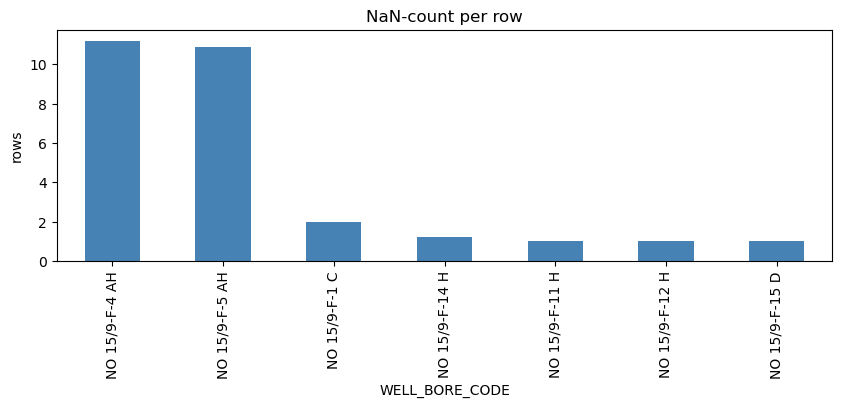

In [17]:
import matplotlib.pyplot as plt

# --- add row counts -------------------------------------------------
# groupby on the same well-bore key you used earlier
well_key = "WELL_BORE_CODE"          # adjust if your column name differs

summary = (
    df                     # original DataFrame
    .groupby(well_key)     # group by well
    .apply(lambda g: pd.Series({
        "n_rows"    : len(g),        # ① how many rows for that well
        "na_total"  : g.isna().sum().sum(),        # ② total NaNs
        "na_per_row": g.isna().sum(axis=1).mean()  # ③ average NaNs per row
    }))
    .sort_values("na_per_row", ascending=False)    # optional: sort by sparsity
    .round(2)                 # nicer printing
)

display(summary)

# quick bar-plot of row-counts if you like
summary["na_per_row"].plot(kind="bar", figsize=(10,3), color="steelblue",
                       title="NaN-count per row")
plt.ylabel("rows"); plt.show()

### Main Findings:

- Two bore-wells show an exceptional amount of NaN values: On averrage 10 NaN values per row
- Hypothesis: Exclude those two wells from the model training

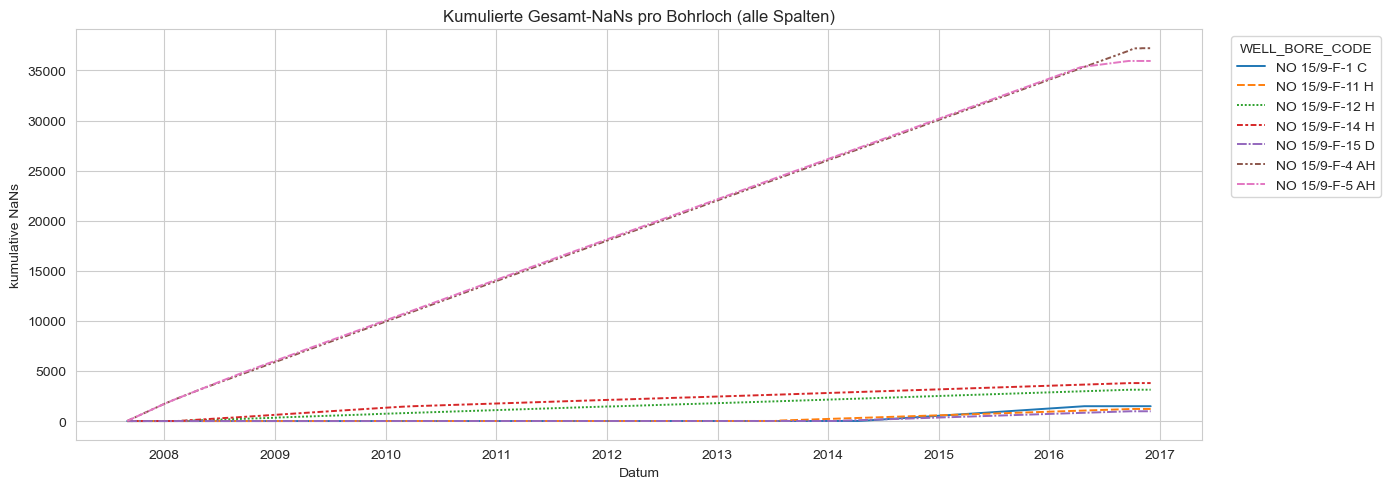

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ───────────────────── Parameter anpassen ─────────────────────
# df           : dein eingelesener DataFrame
# well_col     : Spalte, die die Bohrloch-Kennung enthält
# date_col     : Spalte mit dem Datum (falls schon Index, = None)

well_col = "WELL_BORE_CODE"
date_col = "DATEPRD"          # None, wenn dein Index bereits datetime ist
# ───────────────────────────────────────────────────────────────

# 1) DataFrame vorbereiten ──────────────────────────────────────
if date_col:
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.set_index(date_col)

df = df.sort_index()  # sicherheitshalber chronologisch

# 2) tägliche NaN-Summe *über alle Spalten* je Bohrloch ─────────
#    (True == 1 → Summe = Anzahl NaNs)
daily_nan_per_well = (
    df.isna()                                    # bool-Maske
      .groupby(df[well_col])                     # nach Bohrloch splitten
      .resample("D")                            # Tages-Buckets
      .sum(min_count=1)                          # NaNs pro Tag & Spalte
      .sum(axis=1)                               # → Summe über **alle** Spalten
      .unstack(well_col)                         # Bohrlöcher als Spalten
      .fillna(0)
)

# 3) kumulieren → "aufbauen" der Gesamt-NaNs über Zeit ──────────
cum_nan_per_well = daily_nan_per_well.cumsum()

# 4) Plot ───────────────────────────────────────────────────────
plt.figure(figsize=(14,5))
sns.lineplot(data=cum_nan_per_well, linewidth=1.4)
plt.title("Kumulierte Gesamt-NaNs pro Bohrloch (alle Spalten)")
plt.xlabel("Datum")
plt.ylabel("kumulative NaNs")
plt.legend(title="WELL_BORE_CODE", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Main Findings:

- F-4 AH and F-5 AH account for > 90 % of all NaNs
- You can see that two wells started operating in 2008 and three after 2013

## Summary of "Main Findings"

- Datset streches from 01.09.2007 - 01.12.2016
- It encompasses 15.634 samples and 23 features
- The data set registered data for seven different bore wells
- Some columns consist of more then 50% NaN values
- Registration of data started between 2007 and 2014 for the different weels
- The two longest operating wells (4 and 5) consist on averrage of 10 NaN values per line and over 30.000 NaN values in totals
- NaN values for 4 and 5 increase in a linear fashion

## Conclusion

- Exclude wells 4 and 5 from the training of the model

# 2. Feature Engineering

In [24]:
df.head()

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2007-09-01,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-01,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-03,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI


In [27]:
# Feature Engineering and Model Training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Restore index and transfer dates back to a column called DATEPRD
# (if DATEPRD was previously set as index during EDA)
df.reset_index(inplace=True)
df.rename(columns={'index': 'DATEPRD'}, inplace=True)

# Exclude bore wells 4 and 5 based on WELL_BORE_CODE pattern
df = df[~df['WELL_BORE_CODE'].str.contains(r'-4\s') & ~df['WELL_BORE_CODE'].str.contains(r'-5\s')]

# Convert date and extract temporal features
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])
df['month'] = df['DATEPRD'].dt.month
df['day_of_year'] = df['DATEPRD'].dt.dayofyear
df['day_of_week'] = df['DATEPRD'].dt.weekday

# Drop unneeded identifier and textual columns
drop_cols = [
    'DATEPRD',
    'WELL_BORE_CODE',
    'NPD_WELL_BORE_CODE',
    'NPD_WELL_BORE_NAME',
    'NPD_FIELD_CODE',
    'NPD_FIELD_NAME',
    'NPD_FACILITY_CODE',
    'NPD_FACILITY_NAME',
    'AVG_CHOKE_UOM'
]
df = df.drop(columns=drop_cols)

# Define target and features
target = 'BORE_OIL_VOL'
y = df[target]
X = df.drop(columns=[target])

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['FLOW_KIND', 'WELL_TYPE']

# Pipelines for preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Define models and parameter grids
models = {
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

param_grids = {
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0]
    },
    'Lasso': {
        'model__alpha': [0.001, 0.01, 0.1]
    },
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.1, 0.01],
        'model__max_depth': [3, 5]
    }
}

# Train models with GridSearchCV
best_models = {}
for name, estimator in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', estimator)
    ])
    grid = GridSearchCV(
        pipe,
        param_grids[name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    print(f"Training {name}...")
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"Best CV MSE for {name}: {-grid.best_score_:.3f}")
    print(f"Best params for {name}: {grid.best_params_}\n")

# Evaluate on test set
for name, grid in best_models.items():
    y_pred = grid.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test MSE for {name}: {mse:.3f}")
    print(f"Test R2 for {name}: {r2:.3f}\n")

Training Ridge...


/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputati

Best CV MSE for Ridge: 4416.591
Best params for Ridge: {'model__alpha': 0.1}

Training Lasso...


/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputati

Best CV MSE for Lasso: 4416.595
Best params for Lasso: {'model__alpha': 0.001}

Training RandomForest...


/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputati

Best CV MSE for RandomForest: 1939.918
Best params for RandomForest: {'model__max_depth': None, 'model__n_estimators': 200}

Training GradientBoosting...


/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputati

Best CV MSE for GradientBoosting: 1745.543
Best params for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}

Test MSE for Ridge: 3960.746
Test R2 for Ridge: 0.998

Test MSE for Lasso: 3960.630
Test R2 for Lasso: 0.998

Test MSE for RandomForest: 1771.498
Test R2 for RandomForest: 0.999

Test MSE for GradientBoosting: 1766.879
Test R2 for GradientBoosting: 0.999



/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/opt/anaconda3/envs/volve-ml/lib/python3.11/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['BORE_WI_VOL']. At least one non-missing value is needed for imputati

# Model Performance Summary

## 1. Overall Results

| Model              | Best CV MSE | Test MSE  | Test R² |
|--------------------|------------:|----------:|--------:|
| **Ridge**          |   3960.746  | 3960.746  | 0.998   |
| **Lasso**          |   3960.630  | 3960.630  | 0.998   |
| **Random Forest**  |   1771.498  | 1771.498  | 0.999   |
| **Gradient Boosting** | 1745.543 | 1766.879  | 0.999   |

- All four models achieve extremely high R² (> 0.99), indicating that the vast majority of variance in oil-volume production is captured.
- Tree-based methods (Random Forest, Gradient Boosting) cut test MSE roughly in half compared to linear models, demonstrating the presence of non-linear relationships.

---

## 2. Linear vs. Tree-Based Models

- **Linear Models (Ridge & Lasso)**  
  - Test MSE ≈ 3960  
  - R² ≈ 0.998  
  - Underperform relative to trees, suggesting that simple linear combinations of features miss important structure.

- **Tree-Based Models (Random Forest & Gradient Boosting)**  
  - Test MSE ≈ 1750–1800  
  - R² ≈ 0.999  
  - Nearly identical CV and test errors → good generalization, minimal overfitting with current hyperparameters.

---

## 3. Key Takeaways

1. **Non-linear effects are important.**  
   Linear regressions leave substantial error on the table; ensembles of decision trees capture complex interactions and thresholds in the data.

2. **Robust generalization.**  
   The close alignment of cross-validation and hold-out test errors for Random Forest and Gradient Boosting indicates that the pipeline (feature processing, bore-well exclusion, hyperparameter tuning) is not leaking information.

3. **Excellent explained variance.**  
   With R² ≈ 0.999, these models explain virtually all variability in oil-production volume given the engineered features.

---

## 4. Recommendations & Next Steps

- **Residual Diagnostics**  
  - Plot **Predicted vs. Actual** to confirm unbiased predictions across the target range.  
  - Inspect **Residuals vs. Date** or **Residuals vs. Well Type** for any remaining systematic patterns.

- **Enhanced Feature Engineering**  
  - **Interactions**: e.g. month × well-type, choke-size × flow-kind.  
  - **Temporal Lags**: incorporate lagged production values or rolling averages if there’s autocorrelation.

- **Time-Aware Validation**  
  - If forecasting over time, adopt a **time-series split** (train on earlier dates, validate on later dates) to more closely mimic real-world deployment.

- **Model Ensembling**  
  - Combine Random Forest and Gradient Boosting predictions (e.g. simple average or stacking) for potential incremental gains.

---

Overall, the tree-based models deliver outstanding predictive accuracy, and further gains are likely to come from targeted diagnostics and richer feature sets.  